In [ ]:
# test file to look at the data and see how to use it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
absolute_path = os.path.abspath("")


In [ ]:
hs1104df = pd.read_csv(absolute_path + "\cleanerHS1104.csv")
hs1104df["Time In"] = pd.to_datetime(hs1104df["Time In"])
hs1104df["Time Out"] = pd.to_datetime(hs1104df["Time Out"])

hs1104df

In [ ]:
hs1104df["Difference"] = hs1104df["Time Out"] - hs1104df["Time In"]
hs1104df

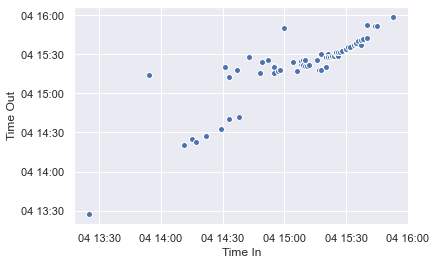

In [41]:
#using sns
sns.set_theme()
def plot_scatter_times(df):
   
    
    sns.scatterplot(data=df, 
                    x="Time In",y="Time Out", )
plot_scatter_times(hs1104df)
    

In [40]:
#eliminate bad data
#clean data
for index, row in hs1104df.iterrows():
    if (row["Difference"].total_seconds()/60) > 300:
        hs1104df.drop(index, inplace=True)

hs1104df

,Date,Dismissal Location,Time In,Time Out,Time In Clean,Time Out Clean,Time Difference,carpool_id,Difference
0,11/4/22 14:00,12th Grade,2022-11-04 13:25:00,2022-11-04 13:27:00,13:25,13:27,0:02,111461,0 days 00:02:00
1,11/4/22 14:00,10th Grade,2022-11-04 13:54:00,2022-11-04 15:14:00,13:54,15:14,1:20,111487,0 days 01:20:00
2,11/4/22 14:00,10th Grade,2022-11-04 14:11:00,2022-11-04 14:20:00,14:11,14:20,0:09,111534,0 days 00:09:00
3,11/4/22 14:00,9th Grade,2022-11-04 14:15:00,2022-11-04 14:25:00,14:15,14:25,0:10,111551,0 days 00:10:00
4,11/4/22 14:00,12th Grade,2022-11-04 14:15:00,2022-11-04 14:25:00,14:15,14:25,0:10,111551,0 days 00:10:00
...,...,...,...,...,...,...,...,...,...
83,11/4/22 14:00,9th Grade,2022-11-04 15:40:00,2022-11-04 15:43:00,15:40,15:43,0:03,111849,0 days 00:03:00
84,11/4/22 14:00,11th Grade,2022-11-04 15:40:00,2022-11-04 15:53:00,15:40,15:53,0:13,111851,0 days 00:13:00
85,11/4/22 14:00,11th Grade,2022-11-04 15:44:00,2022-11-04 15:52:00,15:44,15:52,0:08,111857,0 days 00:08:00
86,11/4/22 14:00,9th Grade,2022-11-04 15:45:00,2022-11-04 15:52:00,15:45,15:52,0:07,111861,0 days 00:07:00
